In [1]:
%reload_ext autoreload

# Imports

import os
import sys
module_path = os.path.abspath(os.path.join('../image_gen_dm')) # or the path to your source code
sys.path.append(str(module_path))

import matplotlib.pyplot as plt
import pandas as pd

TF_ENABLE_ONEDNN_OPTS=0
os.environ['TF_ENABLE_ONEDNN_OPTS'] = str(TF_ENABLE_ONEDNN_OPTS)
os.environ['TG_GPU_ALLOCATOR'] = 'cuda_malloc_async'


In [2]:
FOLDER_PATH = 'res/histories'

files = os.listdir(FOLDER_PATH)


CD-VAE29 loss:  2579.621650695801
CD-VAE30 loss:  2578.223175048828
CD-VAE31 loss:  2577.3248138427734
CD-VAE32 loss:  2577.2651901245117
CD-VAE33 loss:  2577.6536712646484
CD-VAE34 loss:  2578.0108795166016
CD-VAE35 loss:  2577.8399353027344
CD-VAE36 loss:  2578.1501998901367
CD-VAE37 loss:  2579.040168762207
CD-VAE38 loss:  2577.89892578125
CD-VAE39 loss:  2580.145637512207
CD-VAE40 loss:  2578.9948348999023
CD-VAE41 loss:  2577.71492767334
CD-VAE42 loss:  2580.110610961914
CD-VAE43 loss:  2577.4585037231445
CD-VAE28 loss:  2577.3263931274414


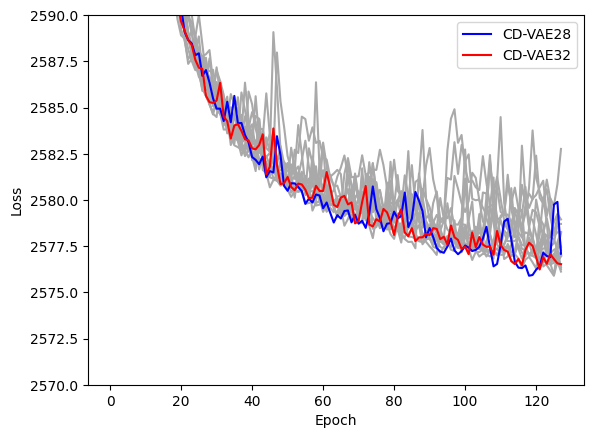

In [8]:
# Plot all histories from csv files in a directory

csv_files = [f for f in files if f.endswith('.csv')]

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.ylim(2570, 2590)

i = 0
for f in csv_files:
    if f.startswith('ncvae'):
        continue

    if i > 27 and i < 44:
        df = pd.read_csv(os.path.join(FOLDER_PATH, f))
        
        df['loss_avg'] = df['loss'].rolling(window=32).mean()

        print(f'CD-VAE{i+1} loss: ', df['loss_avg'].iloc[-1])

        name = f[:-4]
        if i == 26:
            pass
        else:
            plt.plot(df['loss'], label=None, color='darkgray')
        #plt.plot(df['loss'], label=f'{name}')

    i += 1

df = pd.read_csv(os.path.join(FOLDER_PATH, 'cvae28.csv'))
plt.plot(df['loss'], label='CD-VAE28', color='blue')

df['loss_avg'] = df['loss'].rolling(window=32).mean()

print(f'CD-VAE28 loss: ', df['loss_avg'].iloc[-1])

df = pd.read_csv(os.path.join(FOLDER_PATH, 'cvae32.csv'))
plt.plot(df['loss'], label='CD-VAE32', color='red')

plt.legend(loc="upper right")

plt.show()